In [5]:
df.columns

Index(['user_id', 'song_id', 'count'], dtype='object')

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os
import random
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('kaggle_visible_evaluation_triplets.csv')

In [6]:
df1=pd.read_csv('unique_tracks.csv')

In [4]:
df

,user_id,song_id,count
0,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOBONKR12A58A7A7E0,1
1,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOEGIYH12A6D4FC0E3,1
2,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOFLJQZ12A6D4FADA6,1
3,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOHTKMO12AB01843B0,1
4,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SODQZCY12A6D4F9D11,1
...,...,...,...
1048570,90aeb21b2f36eb46d1c5d48fa030b4b8fa818b52,SOEPEVY12AB01822A1,2
1048571,90aeb21b2f36eb46d1c5d48fa030b4b8fa818b52,SOLHTJY12A58A7AFE7,1
1048572,90aeb21b2f36eb46d1c5d48fa030b4b8fa818b52,SODBAHE12A8C132D34,2
1048573,90aeb21b2f36eb46d1c5d48fa030b4b8fa818b52,SOAVWHY12AB017C6C0,3


In [7]:
df1

,taste_id,song_id,artist,song_name
0,TRMMMYQ128F932D901,SOQMMHC12AB0180CB8,Faster Pussy cat,Silent Night
1,TRMMMKD128F425225D,SOVFVAK12A8C1350D9,Karkkiautomaatti,Tanssi vaan
2,TRMMMRX128F93187D9,SOGTUKN12AB017F4F1,Hudson Mohawke,No One Could Ever
3,TRMMMCH128F425532C,SOBNYVR12A8C13558C,Yerba Brava,Si Vos QuerÃ©s
4,TRMMMWA128F426B589,SOHSBXH12A8C13B0DF,Der Mystic,Tangle Of Aspens
...,...,...,...,...
999995,TRYYYUS12903CD2DF0,SOTXAME12AB018F136,Kiko Navarro,O Samba Da Vida
999996,TRYYYJO128F426DA37,SOXQYIQ12A8C137FBB,Kuldeep Manak,Jago Chhadeo
999997,TRYYYMG128F4260ECA,SOHODZI12A8C137BB3,Gabriel Le Mar,Novemba
999998,TRYYYDJ128F9310A21,SOLXGOR12A81C21EB7,Elude,Faraday


## Merging both the dataset on song_id

In [8]:
df_new=pd.merge(df,df1.drop_duplicates(['song_id']),on='song_id',how='left')

In [9]:
df_new

,user_id,song_id,count,taste_id,artist,song_name
0,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOBONKR12A58A7A7E0,1,TRAEHHJ12903CF492F,Dwight Yoakam,You're The One
1,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOEGIYH12A6D4FC0E3,1,TRLGMFJ128F4217DBE,Barry Tuckwell/Academy of St Martin-in-the-Fie...,Horn Concerto No. 4 in E flat K495: II. Romanc...
2,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOFLJQZ12A6D4FADA6,1,TRTNDNE128F1486812,Cartola,Tive Sim
3,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOHTKMO12AB01843B0,1,TRASTUE128F930D488,Lonnie Gordon,Catch You Baby (Steve Pitron & Max Sanna Radio...
4,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SODQZCY12A6D4F9D11,1,TRFPLWO128F1486B9E,Miguel Calo,El Cuatrero
...,...,...,...,...,...,...
1048570,90aeb21b2f36eb46d1c5d48fa030b4b8fa818b52,SOEPEVY12AB01822A1,2,TRXHJNZ128F93443A5,De Saloon,Hombre muerto
1048571,90aeb21b2f36eb46d1c5d48fa030b4b8fa818b52,SOLHTJY12A58A7AFE7,1,TREIPHK128F42626AB,Suicidal Tendencies,Go Skate! (Possessed To Skate '97)
1048572,90aeb21b2f36eb46d1c5d48fa030b4b8fa818b52,SODBAHE12A8C132D34,2,TRQEQHH12903CA6CE5,Shakira,Sombra De Ti
1048573,90aeb21b2f36eb46d1c5d48fa030b4b8fa818b52,SOAVWHY12AB017C6C0,3,TRGSVZA128F92CF92E,The Killers,Losing Touch


In [10]:
df_new.isnull().sum()

user_id      0
song_id      0
count        0
taste_id     0
artist       0
song_name    1
dtype: int64

## Basic Statistics

In [11]:
print('Total data points:',df_new.shape[0])
print('Total number of users:',df_new['user_id'].unique().shape[0])
print('Total number of songs:',df_new['song_id'].unique().shape[0])
print('Total number of tracks:',df_new['taste_id'].unique().shape[0])

Total data points: 1048575
Total number of users: 79451
Total number of songs: 142915
Total number of tracks: 142915


In [12]:
print('Number of Unique Release',df_new['song_name'].unique().shape[0])
print('Number of Unique Artist',df_new['artist'].unique().shape[0])

Number of Unique Release 121476
Number of Unique Artist 26487


In [54]:
df_new["count"].sum()

3335779

In [13]:
df_new.describe()

,count
count,1.048575e+06
mean,3.181250e+00
std,7.070194e+00
min,1.000000e+00
25%,1.000000e+00
50%,1.000000e+00
75%,3.000000e+00
max,6.460000e+02


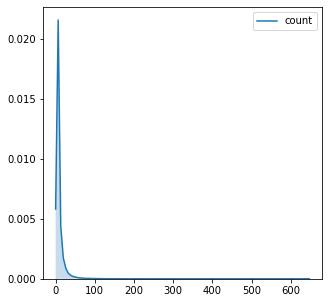

In [14]:
plt.figure(figsize=(5,5))
sns.kdeplot(df_new['count'], shade=True);

In [15]:
df_new.dtypes

user_id      object
song_id      object
count         int64
taste_id     object
artist       object
song_name    object
dtype: object

In [16]:
x=df_new.groupby(['user_id','count','song_id','taste_id'])

In [17]:
x.first()

artist  \
user_id                                  count song_id            taste_id                                     
00007a02388c208ea7176479f6ae06f8224355b3 1     SONGABP12A8C1442D4 TRPELED128F92C577D     Stone Temple Pilots   
                                               SONZGLW12A6D4FBBC1 TRFNAOK128F92F4B77              Sam Sparro   
                                               SOSPTOE12A6D4F938C TRDPXKD128F1499EF3                 Local H   
                                               SOTNDOM12AF729CADB TRGZUAD128F421CE5E              Sam Sparro   
                                               SOXMOQF12A6701FB8B TRZUWSX128F92F491A                No Doubt   
...                                                                                                      ...   
ffff07d7d9bb187aa58c7b81b3d3f35e7cf7c0ee 1     SOKTVCV12AB017E793 TRCWCYC128F9343086  Fabolous / Keri Hilson   
                                               SOUSQCN12A8C133302 TROXXYE128F4267245         Destiny's Child   
                                         2     SODKXYM12A8C1383FB TROHVOE128F4276FAB              Reni Jusis   
                                         5     SOOPDFE12A8C1386BB TRCAQLO128F4284DD0                 Kenny G   
                                         25    SOPSVIR12A8C138BB5 TRXFYCU128F4258741                 Bauhaus   

                                                                                                              song_name  
user_id                                  count song_id            taste_id                                               
00007a02388c208ea7176479f6ae06f8224355b3 1     SONGABP12A8C1442D4 TRPELED128F92C577D  Interstate Love Song (LP Version)  
                                               SONZGLW12A6D4FBBC1 TRFNAOK128F92F4B77                       Black & Gold  
                                               SOSPTOE12A6D4F938C TRDPXKD128F1499EF3                Bound For The Floor  
                                               SOTNDOM12AF729CADB TRGZUAD128F421CE5E                        Cottonmouth  
                                               SOXMOQF12A6701FB8B TRZUWSX128F92F491A                         Spiderwebs  
...                                                                                                                 ...  
ffff07d7d9bb187aa58c7b81b3d3f35e7cf7c0ee 1     SOKTVCV12AB017E793 TRCWCYC128F9343086   Everything_ Everyday_ Everywhere  
                                               SOUSQCN12A8C133302 TROXXYE128F4267245                        Say My Name  
                                         2     SODKXYM12A8C1383FB TROHVOE128F4276FAB                     Raczej Inaczej  
                                         5     SOOPDFE12A8C1386BB TRCAQLO128F4284DD0                         Tradewinds  
                                         25    SOPSVIR12A8C138BB5 TRXFYCU128F4258741                     Ziggy Stardust  

[1048575 rows x 2 columns]

In [18]:
x1=df_new.groupby(['song_id','count'])

In [19]:
x1.first()

user_id  \
song_id            count                                             
SOAAAFI12A6D4F9C66 1      d075a43b518c724d8498db70b623eda22cfd2f45   
SOAAAGK12AB0189572 2      8184aaddf11c4892fdd93fba7dc5e54f8d72eefb   
SOAAAGQ12A8C1420C8 1      0b91b7ba26eea486bcc6aee4e345cbbfe308c4a0   
                   2      4e0a4bcaa5b34b553e61cb6d795ec79d152d4c22   
                   3      89dfb6294d50df97808bacf71854bd75263b6fef   
...                                                            ...   
SOZZZPV12A8C1444B5 16     09a1e24438a7c689c31092c01f1f07fcdddc0232   
                   17     50af13d5cf3561df99480d2d2dca08ea8f4391de   
                   19     7f50bd1bc97d7cca44611fa3036ad3c130561d40   
SOZZZRV12A8C1361F1 1      9f3e83cd1438ce627fdf1f4569e5ad39d3b58bdb   
SOZZZWN12AF72A1E29 1      e56969ef30872d84ac6595521fae715ba455d067   

                                    taste_id  \
song_id            count                       
SOAAAFI12A6D4F9C66 1      TRZEXLQ128F1491D17   
SOAAAGK12AB0189572 2      TRDZUFJ12903CE29FC   
SOAAAGQ12A8C1420C8 1      TRJWZII128F92CA924   
                   2      TRJWZII128F92CA924   
                   3      TRJWZII128F92CA924   
...                                      ...   
SOZZZPV12A8C1444B5 16     TRUXMIW128F92F999F   
                   17     TRUXMIW128F92F999F   
                   19     TRUXMIW128F92F999F   
SOZZZRV12A8C1361F1 1      TRCEWAR128F425D1B6   
SOZZZWN12AF72A1E29 1      TRLAYKX128F92E728C   

                                                       artist  \
song_id            count                                        
SOAAAFI12A6D4F9C66 1      I Love You But I've Chosen Darkness   
SOAAAGK12AB0189572 2                         Au Revoir Simone   
SOAAAGQ12A8C1420C8 1                Bohren & Der Club Of Gore   
                   2                Bohren & Der Club Of Gore   
                   3                Bohren & Der Club Of Gore   
...                                                       ...   
SOZZZPV12A8C1444B5 16                      Blacks ft. P Money   
                   17                      Blacks ft. P Money   
                   19                      Blacks ft. P Money   
SOZZZRV12A8C1361F1 1                              Sangre Azul   
SOZZZWN12AF72A1E29 1                           James McMurtry   

                                 song_name  
song_id            count                    
SOAAAFI12A6D4F9C66 1      The Less You See  
SOAAAGK12AB0189572 2              Grateful  
SOAAAGQ12A8C1420C8 1             Orgelblut  
                   2             Orgelblut  
                   3             Orgelblut  
...                                    ...  
SOZZZPV12A8C1444B5 16            Fall Back  
                   17            Fall Back  
                   19            Fall Back  
SOZZZRV12A8C1361F1 1       Cuerpo A Cuerpo  
SOZZZWN12AF72A1E29 1             Peter Pan  

[331270 rows x 4 columns]

## Analysis of user_id

In [53]:
song_name_per_users=df_new['user_id'].value_counts()
song_name_per_users

7d90be8dfdbde170f036ce8a4b915440137cb11c    53
d30e18323f15426c3cdc8585252ed34459916f51    52
2e424b28bff1f62a2dae22a918f09f9c30c06d1b    52
016a24e91a72c159a5048ab1b9b2ba5ce761b526    52
0f8308935bcbb9a1e04ebb7c4d41c037e5f23b90    52
                                            ..
a8f1c3ff1c8dff77bca28f2797fe8aae0788650f     5
4eb9b8bf9b31043495109a1b3598f9b6c334a335     5
1f414721f9564534744789e6bfe0409963ac49b8     5
4a05ef3874a718fb59605a75b505df01562249ec     5
9df7f090b087a841e8c2bd89a0fb919fd187dab7     5
Name: user_id, Length: 79451, dtype: int64

In [20]:
# cummulative sum of listen count of the songs
song_grogsruped = df_new.groupby(['user_id']).agg({'count':'count'}).reset_index()
song_grogsruped.sort_values(['count'],ascending= False)

,user_id,count
39030,7d90be8dfdbde170f036ce8a4b915440137cb11c,53
4813,0f8308935bcbb9a1e04ebb7c4d41c037e5f23b90,52
14496,2e424b28bff1f62a2dae22a918f09f9c30c06d1b,52
445,016a24e91a72c159a5048ab1b9b2ba5ce761b526,52
65523,d30e18323f15426c3cdc8585252ed34459916f51,52
...,...,...
33517,6bcb76befd192b0b51898caaa2ffae1b507db95a,5
67820,da768496925a3df0986c10b634e66a3d0dcdc19d,5
33527,6bd8287b6cde35f145cfe72ea67021d61d42dc23,5
72655,ea402a1d523dba446f60ea3d4f38144322c68aa7,5


## Analysis of artist

In [21]:
artist_group = df_new.groupby(['artist']).agg({'count':'count'}).reset_index()
artist_group.sort_values('count')
artist_group.head()

,artist,count
0,!!!,72
1,!Deladap,2
2,& And Oceans,1
3,'68 Comeback,19
4,'N Sync/Phil Collins,40


In [59]:
len(df_new['artist'].unique())

26487

In [60]:
df_new['artist'].value_counts()

Coldplay                           9070
Kings Of Leon                      6195
Florence + The Machine             5852
Justin Bieber                      5605
Jack Johnson                       4824
                                   ... 
Burnski                               1
The War On Drugs                      1
Orange Factory Feat. Mike Notar       1
Whitney Houston & Deborah Cox         1
Pipilotti Rist                        1
Name: artist, Length: 26487, dtype: int64

In [22]:
df_new[df_new['artist']=='Coldplay']['song_name'].unique()

array(['Yellow', 'The Scientist', 'Fix You', "Don't Panic", 'Sparks',
       'Clocks', 'Life In Technicolor ii', 'Such A Rush',
       'Fix You (Live)', 'Speed Of Sound', 'Lost!',
       'God Put A Smile Upon Your Face', 'Brothers & Sisters',
       'A Rush Of Blood To The Head', 'Clocks (Live In Sydney)',
       'One I Love', 'For You', 'You Only Live Twice (Live From Norway)',
       'Shiver', 'Swallowed In The Sea', 'In My Place',
       'Postcards From Far Away', 'Glass Of Water',
       "Things I Don't Understand", 'Strawberry Swing', '42',
       'Til Kingdom Come', 'The Goldrush', 'X & Y', 'Life In Technicolor',
       'We Never Change', 'Bigger Stronger', 'What If', 'Trouble',
       "Everything's Not Lost (Includes Hidden Track 'Life Is For Living')",
       'Only Superstition', 'Politik', 'Careful Where You Stand',
       'Warning Sign', 'See You Soon', 'Spies', 'Cemeteries Of London',
       'A Whisper', 'A Message', 'Square One', 'Low', 'I Bloom Blaum',
       'I Ran Away',

In [61]:
len(df_new[df_new['artist']=='Coldplay']['song_name'].unique())

76

In [23]:
df_new[df_new['artist']=='Justin Bieber']['song_name'].unique()

array(['Somebody To Love', 'Down To Earth', 'One Time', 'U Smile',
       'Favorite Girl', 'Love Me', 'Common Denominator',
       'Never Let You Go', 'Stuck In The Moment', 'Up',
       'One Less Lonely Girl', 'That Should Be Me', 'Bigger',
       'Runaway Love'], dtype=object)

In [24]:
artist_group['artist']

0                          !!!
1                     !Deladap
2                 & And Oceans
3                 '68 Comeback
4         'N Sync/Phil Collins
                 ...          
26482          Ã“lafur Arnalds
26483           Ã‰rika Machado
26484            Ã‰tienne Daho
26485    Ã�ngeles del Infierno
26486                     Ã�on
Name: artist, Length: 26487, dtype: object

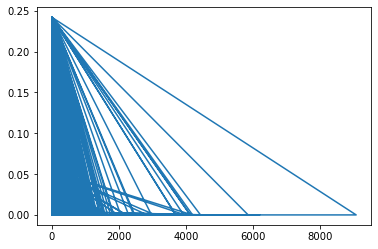

In [25]:
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt



plt.plot(artist_group['count'], norm.pdf(artist_group['count']))

plt.show()

In [26]:
artist_per_users=df_new['artist'].value_counts()
sorted_artist_per_user=artist_per_users.sort_values(ascending= False)

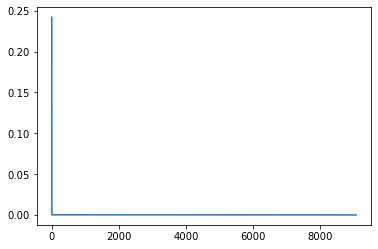

In [50]:
from scipy import stats
pdf = stats.norm.pdf(sorted_artist_per_user)
plt.plot(sorted_artist_per_user,pdf, label = "PDF")

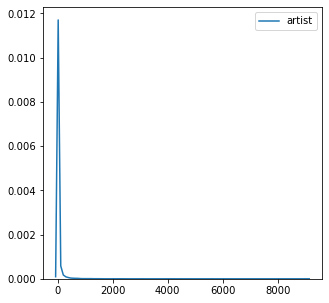

In [28]:
plt.figure(figsize=(5,5))
sns.kdeplot(sorted_artist_per_user, shade= False)

## song_name

In [30]:
song_name_per_users=df_new['song_name'].value_counts()

In [31]:
song_name_per_usesrs=df_new['song_name'].value_counts().sum()

In [32]:
song_name_per_usesrs 

1048574

In [33]:
song_name_per_users.sort_values().head()

My Honey And Me              1
You Did It You Did It        1
Autoironia                   1
Avant Garden                 1
Maureen (Live In Bolinas)    1
Name: song_name, dtype: int64

In [34]:
song_name_per_users.sort_values().tail(20)

Ain't Misbehavin                                                       1229
Canada                                                                 1242
ReprÃ©sente                                                            1250
The Scientist                                                          1268
SinceritÃ© Et Jalousie                                                 1301
Use Somebody                                                           1377
Marry Me                                                               1444
Catch You Baby (Steve Pitron & Max Sanna Radio Edit)                   1530
OMG                                                                    1600
Drop The World                                                         1625
Tive Sim                                                               1937
Fireflies                                                              1999
Hey_ Soul Sister                                                       2049
Horn Concert

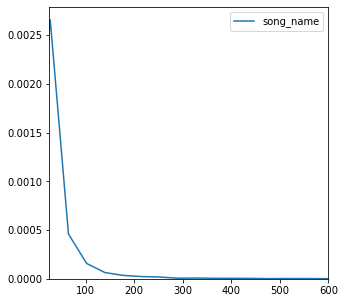

In [48]:
plt.figure(figsize=(5,5))
plt.xlim(25,600)
sns.kdeplot(song_name_per_users, shade= False)

###

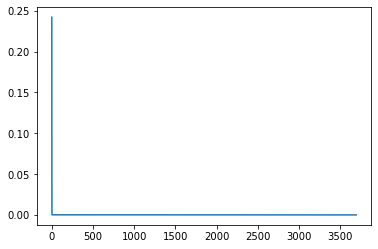

In [52]:
from scipy import stats
pdf = stats.norm.pdf(song_name_per_users)
plt.plot(song_name_per_users,pdf, label = "PDF")

In [36]:
# cummulative sum of listen count of the songs
sna = df_new.groupby(['song_name']).agg({'count':'count'}).reset_index()
sna

,song_name,count
0,Ef Ã‰g HefÃ°i Aldrei...,1
1,Light Mass Prayers,4
2,"The Arsonist Story"": Evil Craves Attention/O...",1
3,Ã‰g Ã�tti GrÃ¡a Ã†sku,4
4,(Jack The Stripper),1
...,...,...
121470,Ã�rboles Cruzados,16
121471,Ã�rboles De La Barranca,1
121472,Ã�rboles de la barranca,1
121473,Ã�rvore,3


In [37]:
grouped_sum = song_grouped['count'].sum()
song_grouped['percentage'] = (song_grouped['count'] / grouped_sum ) * 100
song_grouped.sort_values(['count', 'song_name'], ascending=False)

NameError: name 'song_grouped' is not defined

In [ ]:
song_grouped['count'].sum()

In [ ]:
# cummulative sum of listen count of the songs
sna = df_new.groupby(['song_name']).agg({'count':'count'}).reset_index()
